In [50]:
import json
import os
from utils.processfunctions import *
import main
import argparse

In [69]:
ALL_PACKET_TYPES = [
    'entity_head_look',
    'spawn_player',
    'entity_relative_move',
    'entity_status',
    'entity_velocity',
    'entity_teleport',
    'entity_metadata',
    'entity_look_and_relative_move',
    'entity_look',
    'entity',
    'meta_0',
     'meta_1',
     'meta_10',
     'meta_11',
     'meta_12',
     'meta_13',
     'meta_14',
     'meta_15',
     'meta_16',
     'meta_17',
     'meta_18',
     'meta_19',
     'meta_20',
     'meta_3',
     'meta_4',
     'meta_6',
     'meta_7',
     'meta_8',
     'meta_9'
]

In [70]:
packet_path = 'test.json'
with open(packet_path, 'r') as f:
    decoded_packets = json.load(f)

In [71]:
decoded_packets

[{'packet_type': 'spawn_player',
  'timestamp': 11785,
  'entity_id': 3506,
  'uuid': 'd2cd83e4e8e0416eadd4c3a02f49a950',
  'x': 8.5,
  'y': 65.0,
  'z': 8.5,
  'yaw': -0.5,
  'pitch': 0.0,
  'current_item': 0},
 {'packet_type': 'spawn_player',
  'timestamp': 11785,
  'entity_id': 3506,
  'uuid': 'd2cd83e4e8e0416eadd4c3a02f49a950',
  'x': 0.5,
  'y': 77.5,
  'z': 35.5,
  'yaw': 0.49609375,
  'pitch': 0.0,
  'current_item': 0},
 {'packet_type': 'entity_head_look',
  'timestamp': 11785,
  'entity_id': 3506,
  'head_yaw': 0.0},
 {'packet_type': 'entity_velocity',
  'timestamp': 11785,
  'entity_id': 3506,
  'velocity_x': 0.0,
  'velocity_y': 0.0,
  'velocity_z': 0.0},
 {'packet_type': 'meta_0',
  'timestamp': 11785,
  'entity_id': 3506,
  'index': 0,
  'data': [0],
  'type': 0},
 {'packet_type': 'meta_8',
  'timestamp': 11785,
  'entity_id': 3506,
  'index': 8,
  'data': [0],
  'type': 0},
 {'packet_type': 'meta_3',
  'timestamp': 11785,
  'entity_id': 3506,
  'index': 3,
  'data': [0],
 

In [72]:
all_uuids = list(set([x['uuid'] for x in decoded_packets if 'uuid' in x]))

In [73]:
all_uuids

['9a097c62cc174967a38e1447d1e4dc17',
 'd2cd83e4e8e0416eadd4c3a02f49a950',
 '7d03bcb0e56644e580adc7834733abbe']

In [74]:
entity_3627 = [x for x in decoded_packets if ('entity_id' in x) and (x['entity_id'] == 3627)] #Naish02

In [75]:
entity_3628 = [x for x in decoded_packets if ('entity_id' in x) and (x['entity_id'] == 3628)] #Falopo360

In [76]:
entity_3506 = [x for x in decoded_packets if ('entity_id' in x) and (x['entity_id'] == 3506)] #Valedictoria

In [77]:
entity_3506

[{'packet_type': 'spawn_player',
  'timestamp': 11785,
  'entity_id': 3506,
  'uuid': 'd2cd83e4e8e0416eadd4c3a02f49a950',
  'x': 8.5,
  'y': 65.0,
  'z': 8.5,
  'yaw': -0.5,
  'pitch': 0.0,
  'current_item': 0},
 {'packet_type': 'spawn_player',
  'timestamp': 11785,
  'entity_id': 3506,
  'uuid': 'd2cd83e4e8e0416eadd4c3a02f49a950',
  'x': 0.5,
  'y': 77.5,
  'z': 35.5,
  'yaw': 0.49609375,
  'pitch': 0.0,
  'current_item': 0},
 {'packet_type': 'entity_head_look',
  'timestamp': 11785,
  'entity_id': 3506,
  'head_yaw': 0.0},
 {'packet_type': 'entity_velocity',
  'timestamp': 11785,
  'entity_id': 3506,
  'velocity_x': 0.0,
  'velocity_y': 0.0,
  'velocity_z': 0.0},
 {'packet_type': 'meta_0',
  'timestamp': 11785,
  'entity_id': 3506,
  'index': 0,
  'data': [0],
  'type': 0},
 {'packet_type': 'meta_8',
  'timestamp': 11785,
  'entity_id': 3506,
  'index': 8,
  'data': [0],
  'type': 0},
 {'packet_type': 'meta_3',
  'timestamp': 11785,
  'entity_id': 3506,
  'index': 3,
  'data': [0],
 

In [78]:
entity_3506_dict = {x: [] for x in ALL_PACKET_TYPES}
for packet in entity_3506:
    packet_type = packet['packet_type']
    entity_3506_dict[packet_type].append(packet)

In [79]:
entity_3506_dict.keys()

dict_keys(['entity_head_look', 'spawn_player', 'entity_relative_move', 'entity_status', 'entity_velocity', 'entity_teleport', 'entity_metadata', 'entity_look_and_relative_move', 'entity_look', 'entity', 'meta_0', 'meta_1', 'meta_10', 'meta_11', 'meta_12', 'meta_13', 'meta_14', 'meta_15', 'meta_16', 'meta_17', 'meta_18', 'meta_19', 'meta_20', 'meta_3', 'meta_4', 'meta_6', 'meta_7', 'meta_8', 'meta_9'])

### Spawn Player, Entity Teleport, Entity Look and Relative Move, Entity Look, Entity


In [80]:
packets_for_yaw_pitch_3506 = []
for key in ['spawn_player','entity_teleport','entity_look_and_relative_move','entity_look','entity']:
    packets_for_yaw_pitch_3506.extend(entity_3506_dict.get(key))

In [81]:
packets_for_yaw_pitch_3506 = sorted(packets_for_yaw_pitch_3506, key = lambda i: i['timestamp'])

In [82]:
time, X, Y, Z = process_yaw_pitch(packets_for_yaw_pitch_3506)

spawn_player 0.0 -0.5
spawn_player 0.0 0.49609375
entity_teleport 0.0 0.49609375
entity_look_and_relative_move 0.0234375 -0.42578125
entity_look_and_relative_move 0.0234375 -0.42578125
entity_look_and_relative_move 0.0234375 -0.42578125
entity_look_and_relative_move 0.0234375 -0.42578125
entity_look_and_relative_move 0.0234375 -0.42578125
entity_look_and_relative_move 0.0234375 -0.42578125
entity_look_and_relative_move 0.0234375 -0.42578125
entity_look_and_relative_move 0.0234375 -0.42578125
entity_look_and_relative_move 0.0234375 -0.42578125
entity_look_and_relative_move 0.0234375 -0.42578125
entity_look_and_relative_move 0.0234375 -0.42578125
entity_look_and_relative_move 0.0234375 -0.42578125
entity_look_and_relative_move 0.0234375 -0.4296875
entity_look_and_relative_move 0.0234375 -0.44921875
entity_look_and_relative_move 0.02734375 -0.48828125
entity_look_and_relative_move 0.03125 0.48828125
entity_look_and_relative_move 0.03125 0.4921875
entity_look_and_relative_move 0.03125 -0.5

In [83]:
import matplotlib.pyplot as plt

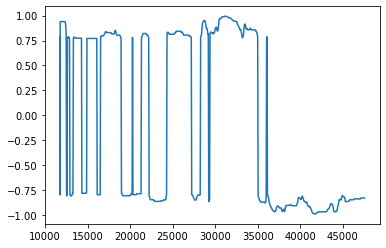

In [84]:
plt.plot(time, X)
plt.show()